# Add Cross Validation



# Updates to make as of 5.30.2023 @ 3:39


- Load data
- Split off Val set
- Apply SMOTE
- Hyper tune
- Pipeline those auto tuned parameters into new model
- break off data into test and train
- Run model and test on test and val set using tuned parameters
- Evaluate




# Reviewed and drop state
- ^^^^^ Do This!!!




# Steps of Machine Learning

- Data Import

- Data Cleaning

- EDA / Feature Eng

- Model Training

- Predict & Deploy

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE-
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from imblearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import FunctionTransformer

# Notes on work needed

In [2]:
# First split is hold out (split off 10/15% as hold out)

#Then split that 

# Use OHE in a pipeline for a column transformer (last lecture on pipeline)

## Dummie classifer - need to look up sklearn model !!!!!!!!! sk learn with access to pipeline

## Where is my train data ---- Cross Val CV pipeline lecture (class violin plot)

# Do some research on if a class is really unbalanced (DT do not handle well - log reg better    ## Need to research)

#### Put this into Pipeline (last lecture we did - work flow with pipelines) 

### add AUC (it applies to any binary class problem) 

### Pipelines are life!! Get to know them --- will save your life -- prevents data leakage (last lecture on pipline workflow)

## Go to phase 5 discussion and look for ideas 

# Re-do notebook with pipelines

# Data Prep

In [3]:

data = pd.read_csv("Raw_Data/Churn_Data.csv")

df = data.drop(columns=['phone number', 'area code', 'state'])

X = df.drop('churn', axis=1)  # Features
y = df['churn']  # Target variable

X

,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


# Setup Dummy Model

In [4]:
# Evaluate the dummy model on the testing set
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X, y)
dummy_predictions = dummy.predict(X)
dummy_accuracy = accuracy_score(y, dummy_predictions)
dummy_precision = precision_score(y, dummy_predictions, zero_division=1)
dummy_recall = recall_score(y, dummy_predictions)
dummy_f1 = f1_score(y, dummy_predictions)

# Define a function to return the constant value from DummyClassifier
def dummy_predict(X):
    return dummy.predict(X).reshape(-1, 1)

# Create instance of SMOTE

In [5]:
# Create an instance of SMOTE
smote = SMOTE()

# OHE

In [6]:
# Perform one-hot encoding for categorical variables
categorical_cols = ['international plan', 'voice mail plan']
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

In [7]:
X_encoded

array([[ 1.  ,  0.  ,  0.  , ...,  3.  ,  2.7 ,  1.  ],
       [ 1.  ,  0.  ,  0.  , ...,  3.  ,  3.7 ,  1.  ],
       [ 1.  ,  0.  ,  1.  , ...,  5.  ,  3.29,  0.  ],
       ...,
       [ 1.  ,  0.  ,  1.  , ...,  6.  ,  3.81,  2.  ],
       [ 0.  ,  1.  ,  1.  , ..., 10.  ,  1.35,  2.  ],
       [ 1.  ,  0.  ,  0.  , ...,  4.  ,  3.7 ,  0.  ]])

In [8]:
# How do I check if this di things right?  ************************

# Split Data

In [9]:
# Split the data into train, validation, and test sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

In [10]:
X_test

array([[1.  , 0.  , 0.  , ..., 2.  , 2.54, 3.  ],
       [0.  , 1.  , 1.  , ..., 4.  , 2.24, 4.  ],
       [1.  , 0.  , 0.  , ..., 3.  , 3.54, 3.  ],
       ...,
       [1.  , 0.  , 0.  , ..., 2.  , 3.59, 1.  ],
       [1.  , 0.  , 0.  , ..., 9.  , 2.78, 1.  ],
       [0.  , 1.  , 1.  , ..., 9.  , 2.08, 1.  ]])

# Apply SMOTE

In [11]:
# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [12]:
y_train.value_counts()

False    1993
True      340
Name: churn, dtype: int64

In [13]:
y_train_resampled.value_counts()

True     1993
False    1993
Name: churn, dtype: int64

# Pipeline

In [14]:
# Everytime I try to use pipeline it doesn't work or complicates situation.... What am I doing wrong??

In [15]:
# Define the pipeline
pipeline = make_pipeline(
    DecisionTreeClassifier()
)

In [16]:
dt_model = DecisionTreeClassifier()

# GridSearch

In [17]:
# Create the GridSearchCV object with the desired parameter grid
param_grid = {'decisiontreeclassifier__max_depth': [None, 5, 10]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_model = grid_search.best_estimator_

# Test Predictions

In [18]:
# Use the best model for prediction on the testing set
test_predictions = best_model.predict(X_test)

# Calc

In [19]:
# Calculate evaluation metrics on the testing set
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions, zero_division=1)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
report = classification_report(y_test, test_predictions)
auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Print the performance metrics for the dummy model
print("Dummy Model Metrics:")
print("Accuracy:", dummy_accuracy)
print("Precision:", dummy_precision)
print("Recall:", dummy_recall)
print("F1 Score:", dummy_f1)

print("\n")

# Print the performance metrics for the best model (decision tree classifier)
print("Best Model Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:")
print(report)
print("AUC:", auc)

Dummy Model Metrics:
Accuracy: 0.8550855085508551
Precision: 1.0
Recall: 0.0
F1 Score: 0.0


Best Model Metrics:
Accuracy: 0.94
Precision: 0.810126582278481
Recall: 0.810126582278481
F1 Score: 0.810126582278481
Classification Report:
              precision    recall  f1-score   support

       False       0.96      0.96      0.96       421
        True       0.81      0.81      0.81        79

    accuracy                           0.94       500
   macro avg       0.89      0.89      0.89       500
weighted avg       0.94      0.94      0.94       500

AUC: 0.8508373673291438


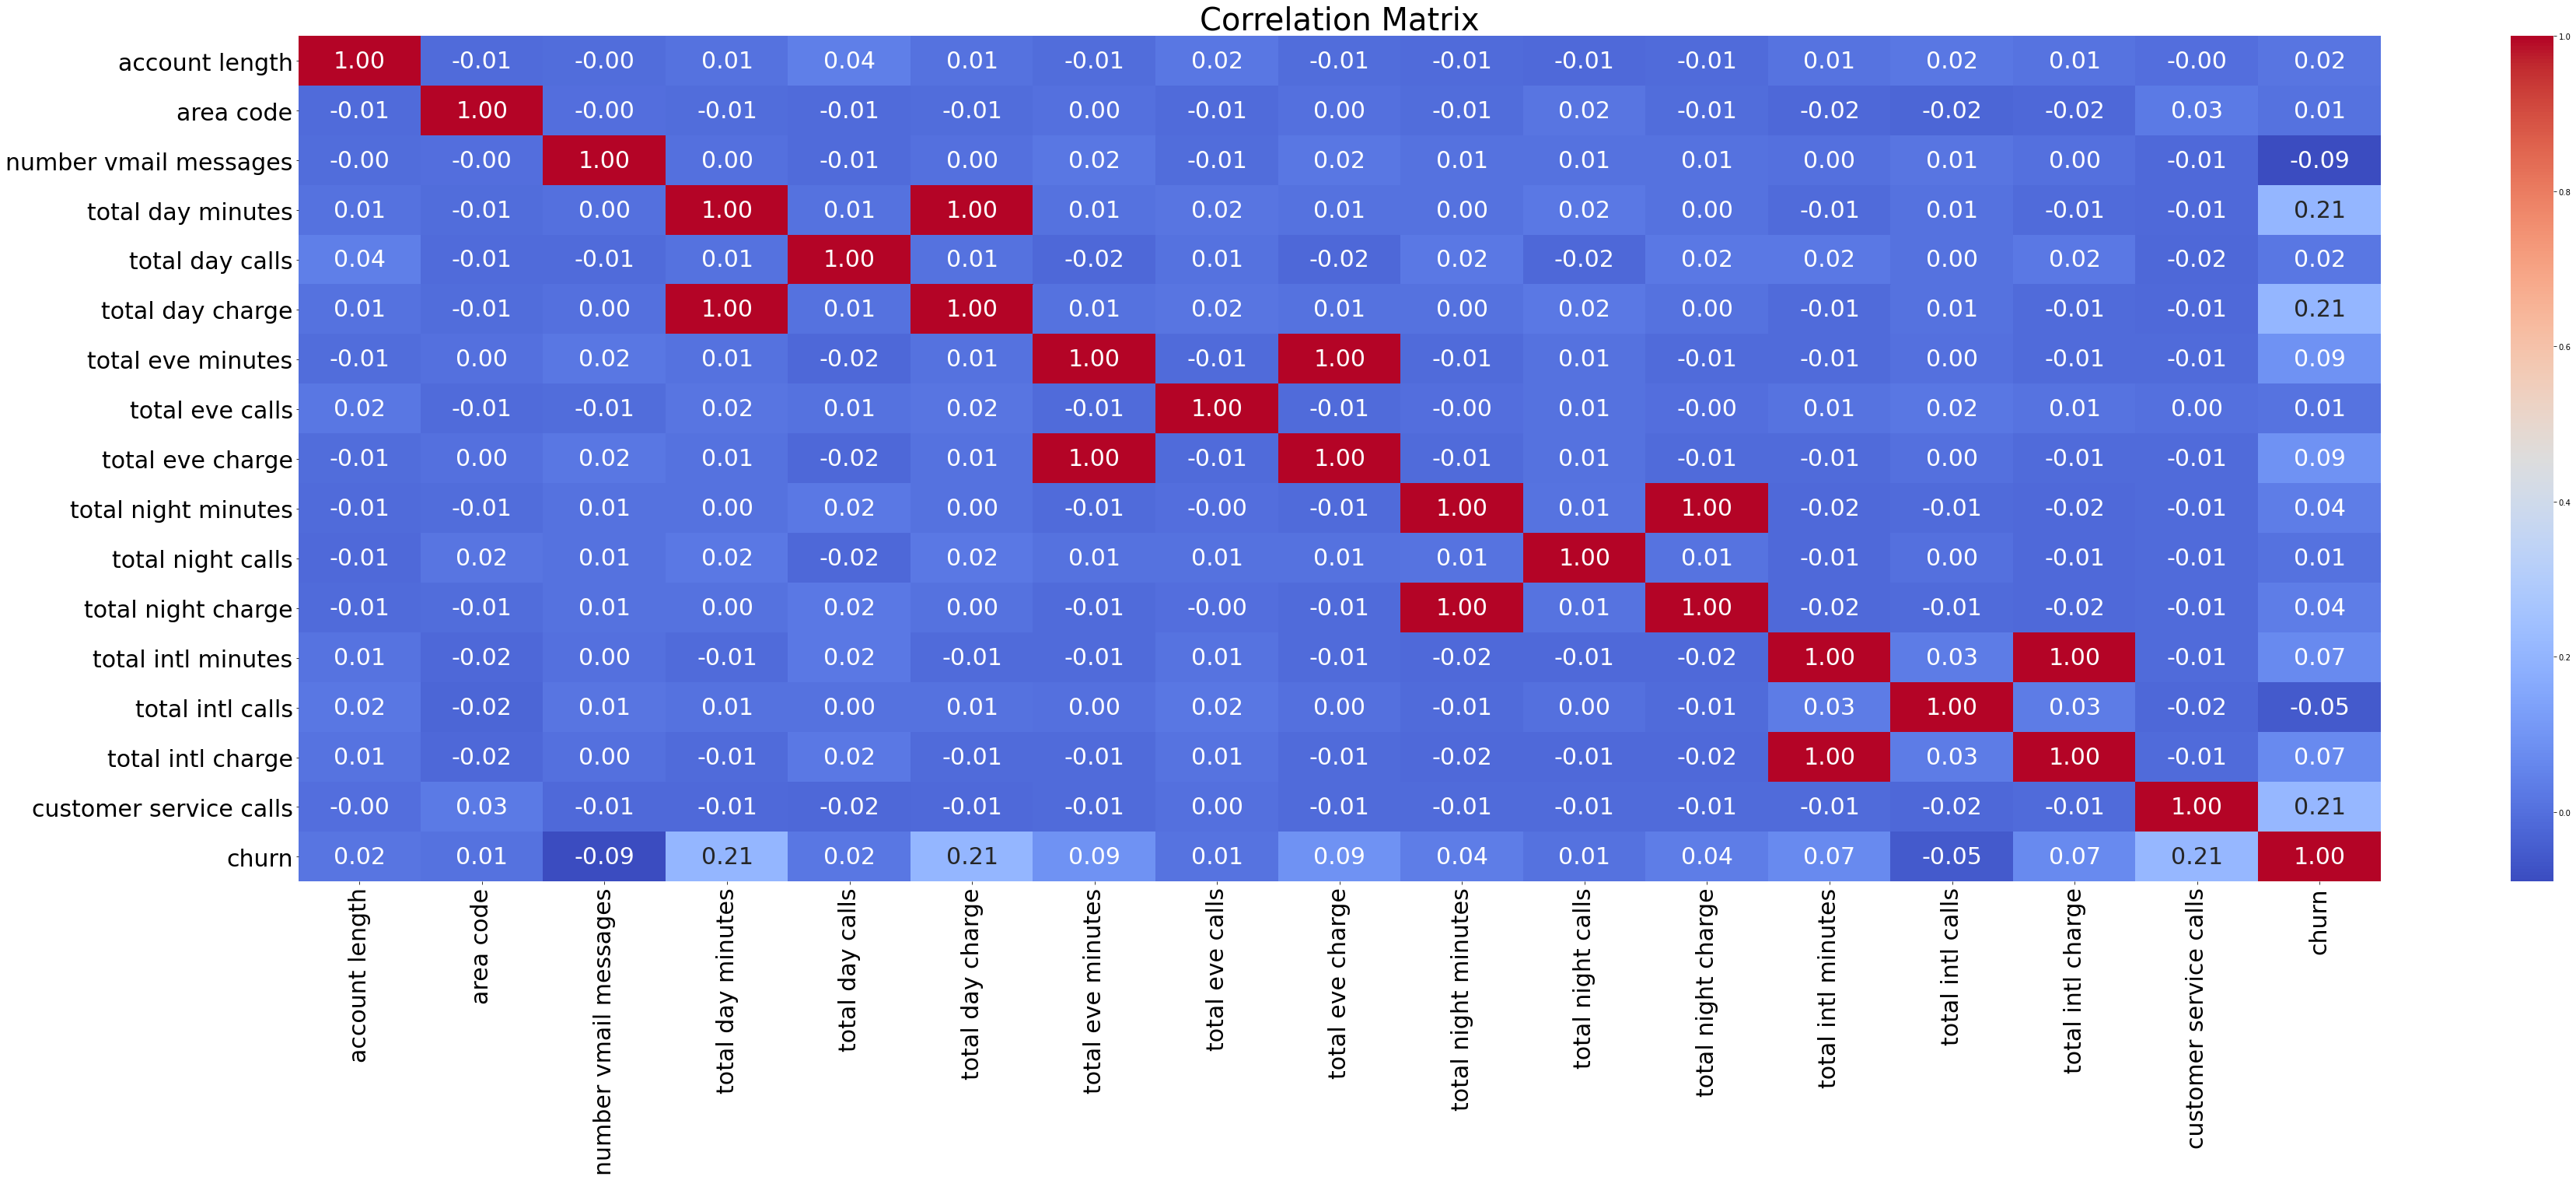

In [20]:
correlation_matrix = data.corr()

plt.figure(figsize=(60, 20))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", annot_kws={"fontsize": 30})
plt.title("Correlation Matrix", fontsize=40)
plt.xticks(fontsize=30, rotation=90)
plt.yticks(fontsize=30)
plt.show()

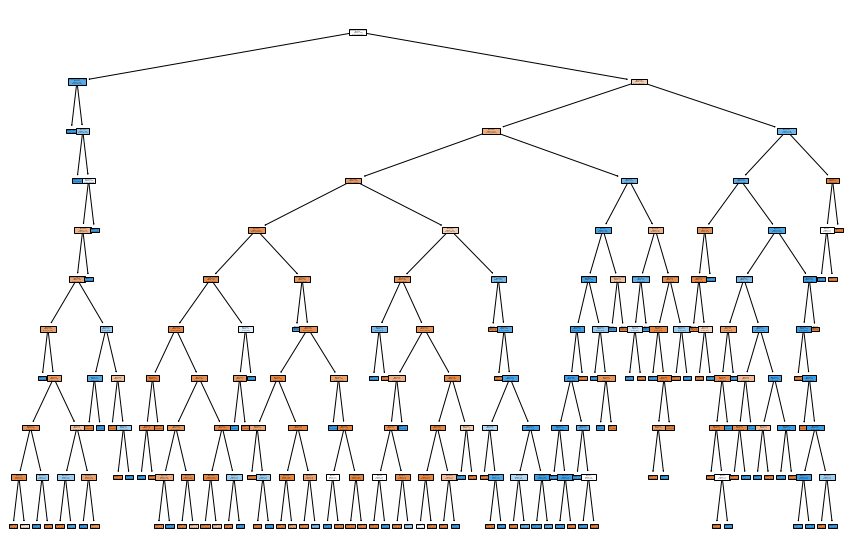

In [21]:
# Get the one-hot encoded feature names
one_hot_encoded_feature_names = []
for category, encoder in zip(categorical_cols, preprocessor.transformers_[0][1].categories_):
    one_hot_encoded_feature_names.extend([f'{category}_{value}' for value in encoder])

# Get the remaining numerical feature names
numerical_feature_names = df.drop(['churn'] + categorical_cols, axis=1).columns

# Combine the feature names
feature_names = one_hot_encoded_feature_names + list(numerical_feature_names)

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_model.named_steps['decisiontreeclassifier'], feature_names=feature_names, filled=True)
plt.show()

In [22]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_auc_score
from sklearn.pipeline import make_pipeline

data = pd.read_csv("Raw_Data/Churn_Data.csv")

df = data.drop(columns=['phone number', 'area code', 'state'])

X = df.drop('churn', axis=1)  # Features
y = df['churn']  # Target variable

# Evaluate the dummy model on the testing set
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X, y)
dummy_predictions = dummy.predict(X)
dummy_accuracy = accuracy_score(y, dummy_predictions)
dummy_precision = precision_score(y, dummy_predictions, zero_division=1)
dummy_recall = recall_score(y, dummy_predictions)
dummy_f1 = f1_score(y, dummy_predictions)

# Define a function to return the constant value from DummyClassifier
def dummy_predict(X):
    return dummy.predict(X).reshape(-1, 1)

# Create an instance of SMOTE
smote = SMOTE()

# Perform one-hot encoding for categorical variables
categorical_cols = ['international plan', 'voice mail plan']
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)
X_encoded = preprocessor.fit_transform(X)

# Split the data into train, validation, and test sets
X_train, X_test_val, y_train, y_test_val = train_test_split(X_encoded, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

pipeline = make_pipeline(
    DecisionTreeClassifier()
)

# Create the GridSearchCV object with the desired parameter grid
param_grid = {'decisiontreeclassifier__max_depth': [None, 5, 10]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the resampled training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best model
best_model = grid_search.best_estimator_

# Use the best model for prediction on the testing set
test_predictions = best_model.predict(X_test)

# Calculate evaluation metrics on the testing set
accuracy = accuracy_score(y_test, test_predictions)
precision = precision_score(y_test, test_predictions, zero_division=1)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
report = classification_report(y_test, test_predictions)
auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Print the performance metrics for the dummy model
print("Dummy Model Metrics:")
print("Accuracy:", dummy_accuracy)
print("Precision:", dummy_precision)
print("Recall:", dummy_recall)
print("F1 Score:", dummy_f1)

print("\n")

# Print the performance metrics for the best model (decision tree classifier)
print("Best Model Metrics:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Classification Report:")
print(report)
print("AUC:", auc)

Dummy Model Metrics:
Accuracy: 0.8550855085508551
Precision: 1.0
Recall: 0.0
F1 Score: 0.0


Best Model Metrics:
Accuracy: 0.914
Precision: 0.6875
Recall: 0.8354430379746836
F1 Score: 0.7542857142857142
Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.93      0.95       421
        True       0.69      0.84      0.75        79

    accuracy                           0.91       500
   macro avg       0.83      0.88      0.85       500
weighted avg       0.92      0.91      0.92       500

AUC: 0.8820920653056316
